In [1]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 

In [2]:
fitness = pd.read_csv("Data/Fitness_iter_1.csv")
G = nx.read_edgelist("Data/facebook_combined.txt",create_using = nx.DiGraph(),nodetype=int)

In [3]:
filtered_nodes = [node for node in G.nodes() if fitness.loc[fitness['node'] == int(node)]['fitness'].values > 0.2]

C:\Users\anisr\AppData\Local\Temp\ipykernel_15768\3894545971.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  filtered_nodes = [node for node in G.nodes() if fitness.loc[fitness['node'] == int(node)]['fitness'].values > 0.2]


In [4]:
filtered_nodes

[62, 113, 172, 261, 1078, 391, 438, 513, 751, 764]

In [5]:
fitness[fitness['fitness']>0].sort_values(by=['fitness'])

,node,fitness
196,1024,0.110742
74,475,0.186098
93,531,0.186254
13,113,0.210225
85,513,0.220561
9,62,0.233804
25,172,0.239618
32,261,0.245017
54,391,0.247093
67,438,0.247924


Text(0.5, 1.0, 'Graph with nodes greater than 0.2 fitness')

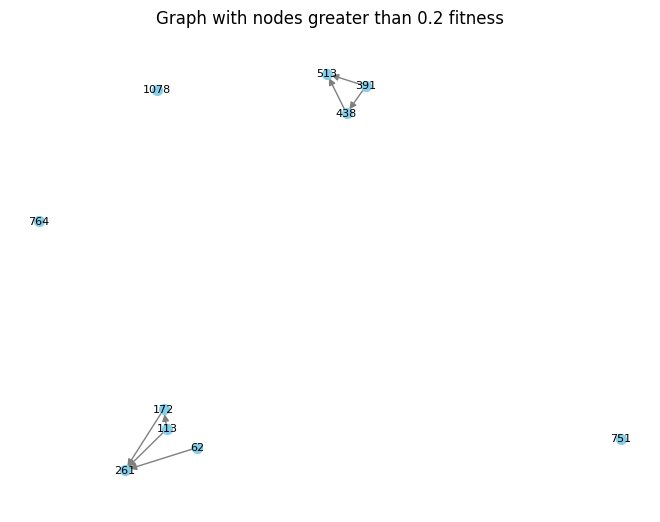

In [7]:
subgraph = G.subgraph(filtered_nodes)
pos = nx.spring_layout(subgraph,seed=101)

nx.draw(subgraph,pos,with_labels= True,node_size=50,font_size=8, node_color="skyblue",edge_color="grey")
plt.title("Graph with nodes greater than 0.2 fitness")

In [34]:
fitness_values = {str(node): fitness for node, fitness in zip(fitness['node'], fitness['fitness'])}

In [35]:
prob = {}
for edge in G.edges():
    prob[edge] = 0.1

In [38]:
from sources.Message_prop_model import message_prop
initial_seed_nodes = filtered_nodes
active_nodes = message_prop(G,initial_seed_nodes,prob)
print("Nodes: ",active_nodes)

Nodes:  {2052, 2075, 2081, 2101, 62, 2111, 2127, 2132, 2133, 2143, 2148, 2153, 113, 2161, 2180, 2183, 2187, 2191, 2196, 2199, 2203, 2215, 172, 2221, 2223, 2224, 2232, 2235, 2241, 2243, 2246, 2247, 2250, 211, 2267, 2268, 2273, 2274, 231, 232, 2280, 2282, 2283, 2279, 2288, 2289, 2292, 2293, 2294, 2302, 2305, 261, 2310, 268, 2318, 271, 272, 2319, 277, 2325, 2327, 2328, 2332, 2333, 2336, 2338, 2343, 2344, 297, 2347, 2350, 2351, 304, 315, 2363, 2368, 323, 324, 325, 2374, 2372, 2376, 2377, 331, 2379, 2384, 2385, 339, 341, 2390, 2392, 2394, 2395, 2396, 2398, 2399, 2408, 2409, 2414, 2415, 2417, 2419, 2420, 2423, 2428, 2429, 2430, 2433, 2434, 2436, 391, 2445, 2446, 2451, 2458, 2460, 2461, 2462, 2463, 2464, 2465, 2467, 2468, 2471, 2472, 2473, 2474, 2475, 2477, 2479, 2482, 2484, 2485, 438, 2489, 2491, 2492, 2495, 2496, 2498, 2500, 2501, 2502, 2504, 2507, 2508, 2509, 2510, 2511, 2512, 2516, 2518, 2519, 2520, 2522, 2524, 2525, 2526, 2529, 2530, 484, 2532, 2533, 2536, 2537, 491, 2539, 493, 2542, 254

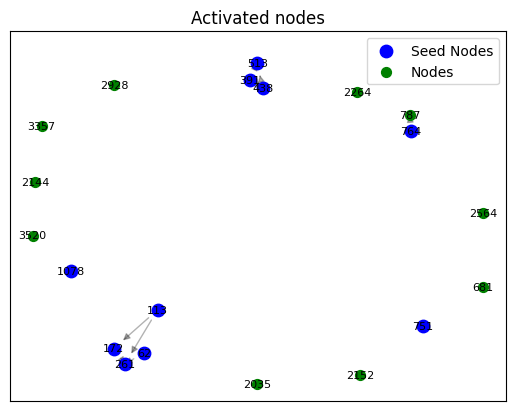

In [104]:
import random
num_nodes_to_plot = 20

subset_nodes = random.sample(list(G.nodes()), num_nodes_to_plot - len(initial_seed_nodes))
subset_seed_nodes = random.sample(initial_seed_nodes, min(10, len(initial_seed_nodes)))

nodes_to_visualize = subset_seed_nodes + subset_nodes

subset_graph = G.subgraph(nodes_to_visualize)

pos = nx.spring_layout(subset_graph, seed=42)
nx.draw_networkx_edges(subset_graph, pos, alpha=0.3)

nx.draw_networkx_nodes(subset_graph, pos, nodelist=subset_seed_nodes, node_color='blue', node_size=80, label='Seed Nodes')
nx.draw_networkx_nodes(subset_graph, pos, nodelist=subset_nodes, node_color='green', node_size=50, label='Nodes')
nx.draw_networkx_labels(subset_graph, pos, font_size=8)

plt.title("Activated nodes")
plt.legend()

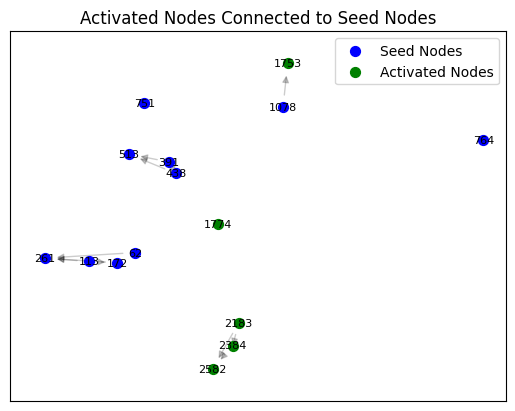

In [122]:
num_nodes_to_plot = 5
subset_activated_nodes = random.sample(active_nodes, min(num_nodes_to_plot, len(active_nodes)))

nodes_to_visualize = initial_seed_nodes + subset_activated_nodes

subset_graph = G.subgraph(nodes_to_visualize)

pos = nx.spring_layout(subset_graph, seed=101)  
nx.draw_networkx_edges(subset_graph, pos, alpha=0.2)

nx.draw_networkx_nodes(subset_graph, pos, nodelist=initial_seed_nodes, node_color='blue', node_size=50, label='Seed Nodes')
nx.draw_networkx_nodes(subset_graph, pos, nodelist=subset_activated_nodes, node_color='green', node_size=50, label='Activated Nodes')
nx.draw_networkx_labels(subset_graph, pos, font_size=8)


plt.title("Activated Nodes Connected to Seed Nodes")
plt.legend()